# Task-04

<i>Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands.</i>

# Importing the necessary libraries

In [128]:
pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

## Reading the dataset

In [130]:
cols=['ID', 'Topic', 'Sentiment', 'Text']
train = pd.read_csv(r"twitter_training.csv",names=cols)

In [131]:
train.head(6)

,ID,Topic,Sentiment,Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
5,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


## Information about the dataframe

In [11]:
train.shape

(74682, 4)

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         74682 non-null  int64 
 1   Topic      74682 non-null  object
 2   Sentiment  74682 non-null  object
 3   Text       73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [13]:
train.describe(include=object)

,Topic,Sentiment,Text
count,74682,74682,73996
unique,32,4,69491
top,TomClancysRainbowSix,Negative,"At the same time, despite the fact that there ..."
freq,2400,22542,172


In [14]:
train['Sentiment'].unique()

array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

## Checking for null/missing values in the dataset

In [15]:
train.isnull().sum()

ID             0
Topic          0
Sentiment      0
Text         686
dtype: int64

In [16]:
train.dropna(inplace=True)

In [17]:
train.isnull().sum()

ID           0
Topic        0
Sentiment    0
Text         0
dtype: int64

## Checking for duplicate values

In [18]:
train.duplicated().sum()

2340

In [19]:
train.drop_duplicates(inplace=True)

In [20]:
train.duplicated().sum()

0

## Visualization of count of different topics

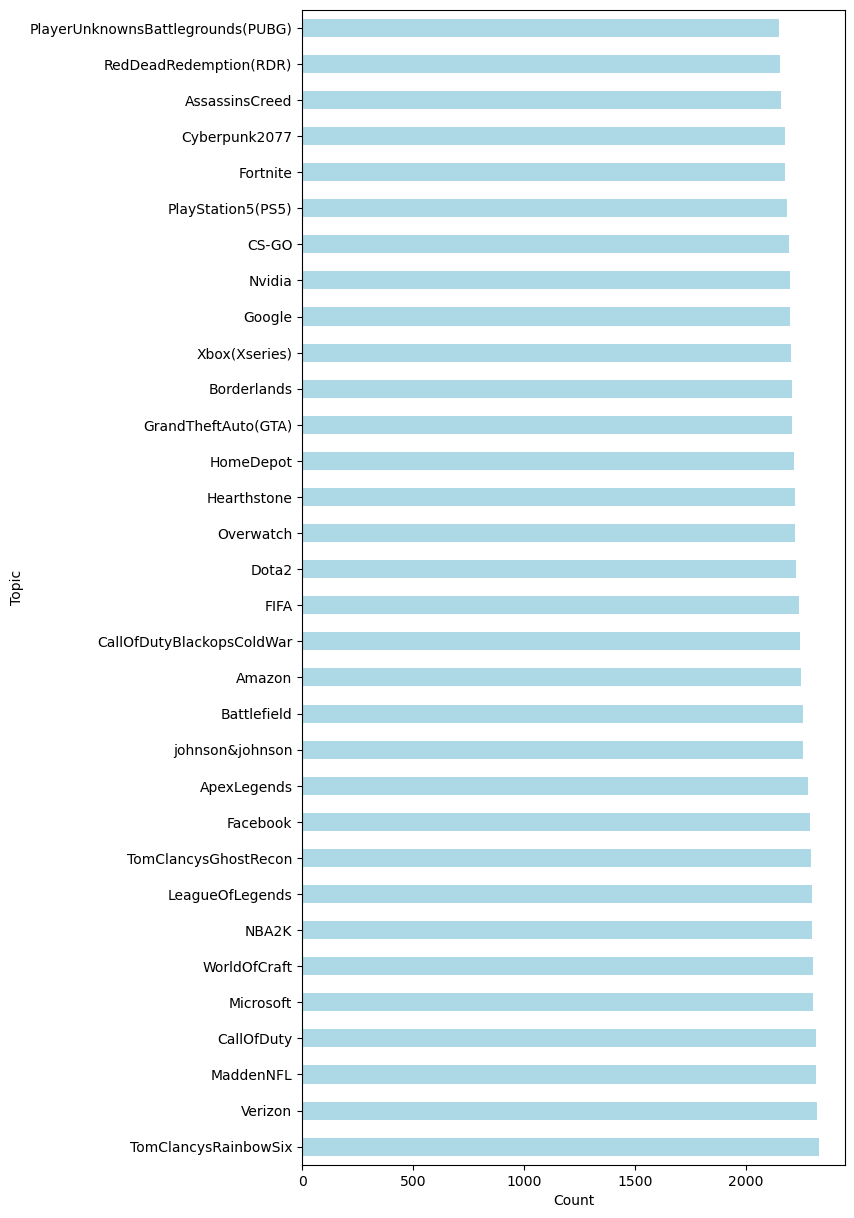

In [37]:
plt.figure(figsize=(7,15))
train['Topic'].value_counts().plot(kind='barh',color='lightBlue')
plt.xlabel("Count")
plt.show()

## Sentiment Distribution

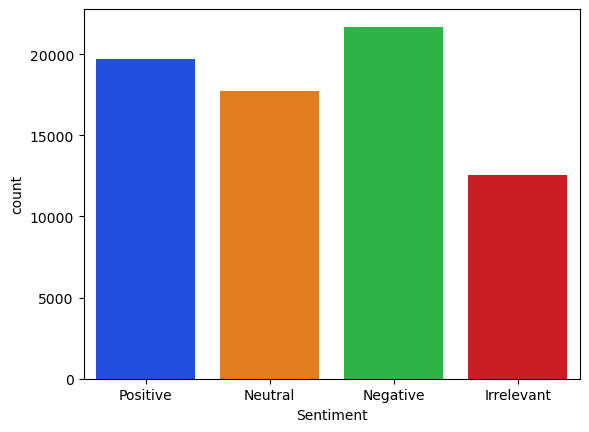

In [38]:
sns.countplot(x = 'Sentiment',data=train,palette='bright')
plt.show()

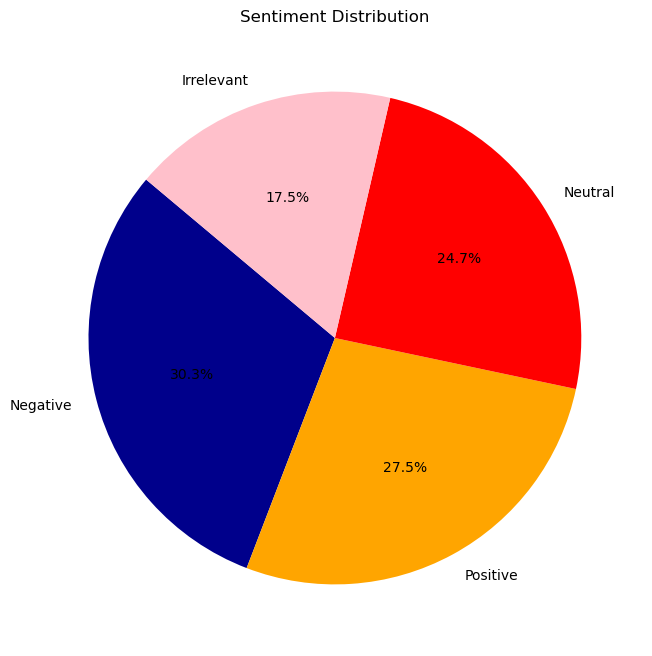

In [47]:
# Calculate the counts for each sentiment
sentiment_counts = train['Sentiment'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct="%1.1f%%", startangle=140, colors=['darkblue', 'orange', 'red', 'pink'])

plt.title('Sentiment Distribution')

# Show the plot
plt.show()


`Observation:`
- Most topic has negative sentiment 

In [48]:
train

,ID,Topic,Sentiment,Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


## Sentiment Distribution Topic-wise

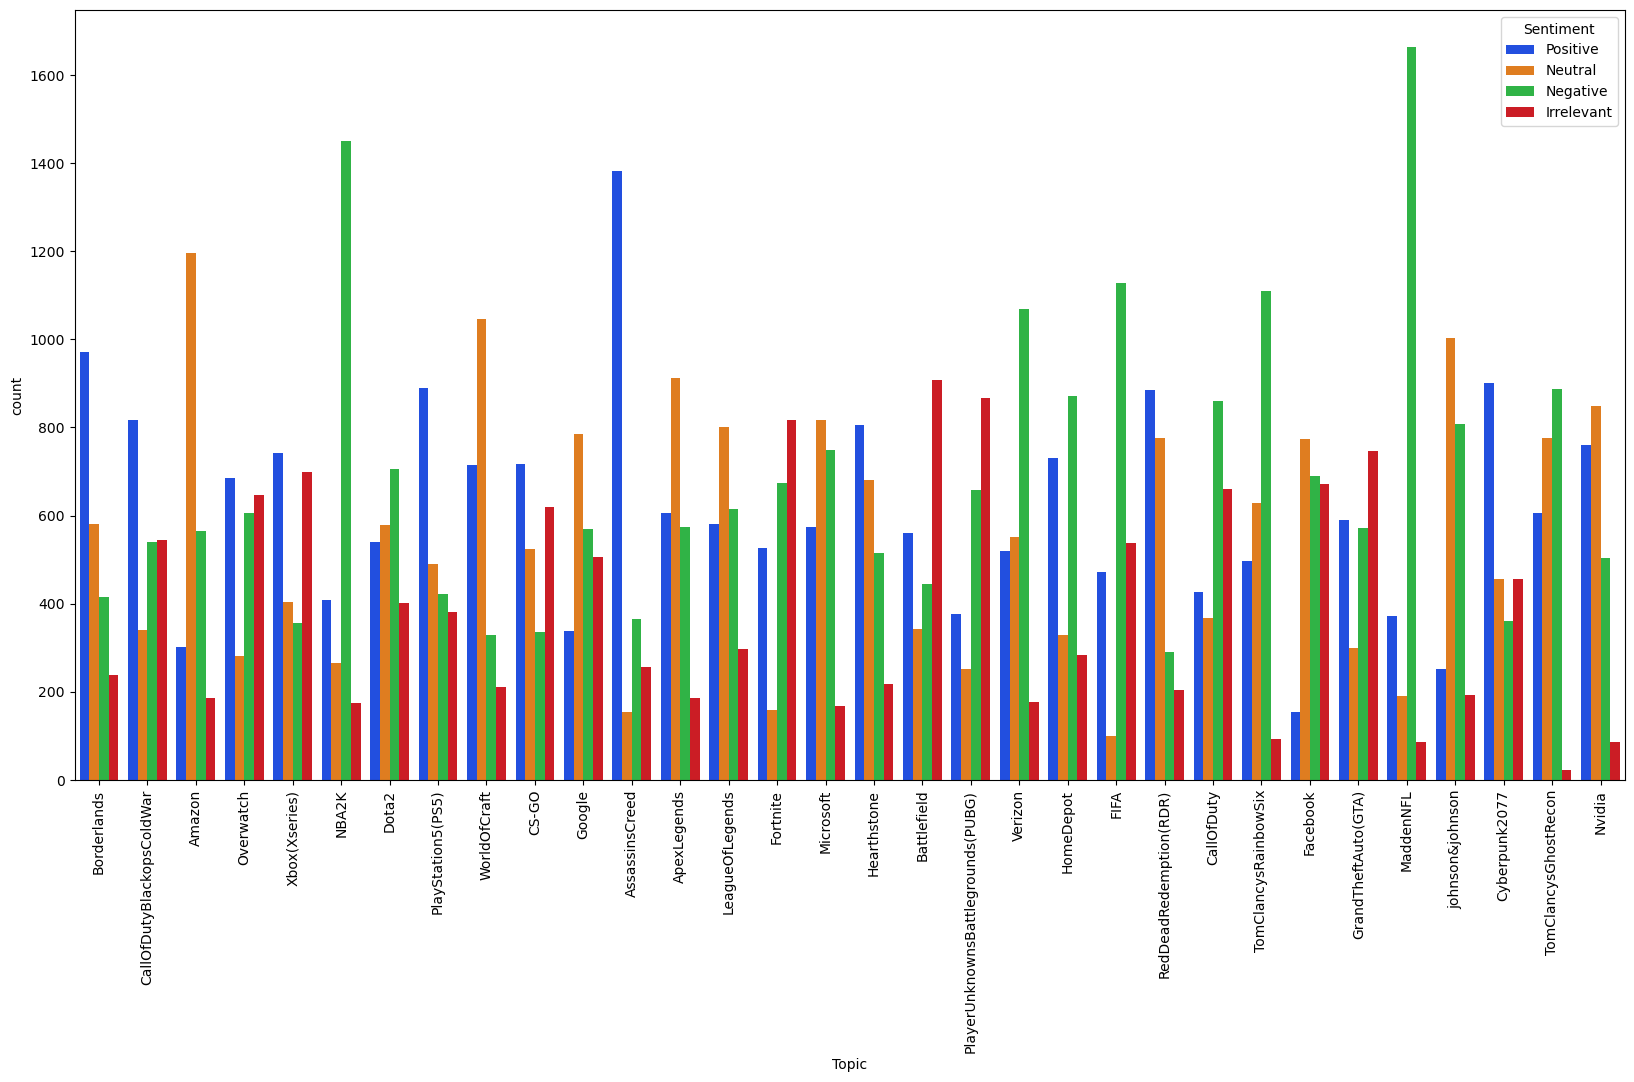

In [59]:
plt.figure(figsize=(20,10))
sns.countplot(x='Topic',data=train,palette='bright',hue='Sentiment')
plt.xticks(rotation=90)
plt.show()

In [60]:
## Group by Topic and Sentiment
topic_wise_sentiment = train.groupby(["Topic", "Sentiment"]).size().reset_index(name='Count')

# Step 2: Select Top 5 Topics
topic_counts = train['Topic'].value_counts().nlargest(5).index
top_topics_sentiment = topic_wise_sentiment[topic_wise_sentiment['Topic'].isin(topic_counts)]

### Top 5 Topics with Negative Sentiments

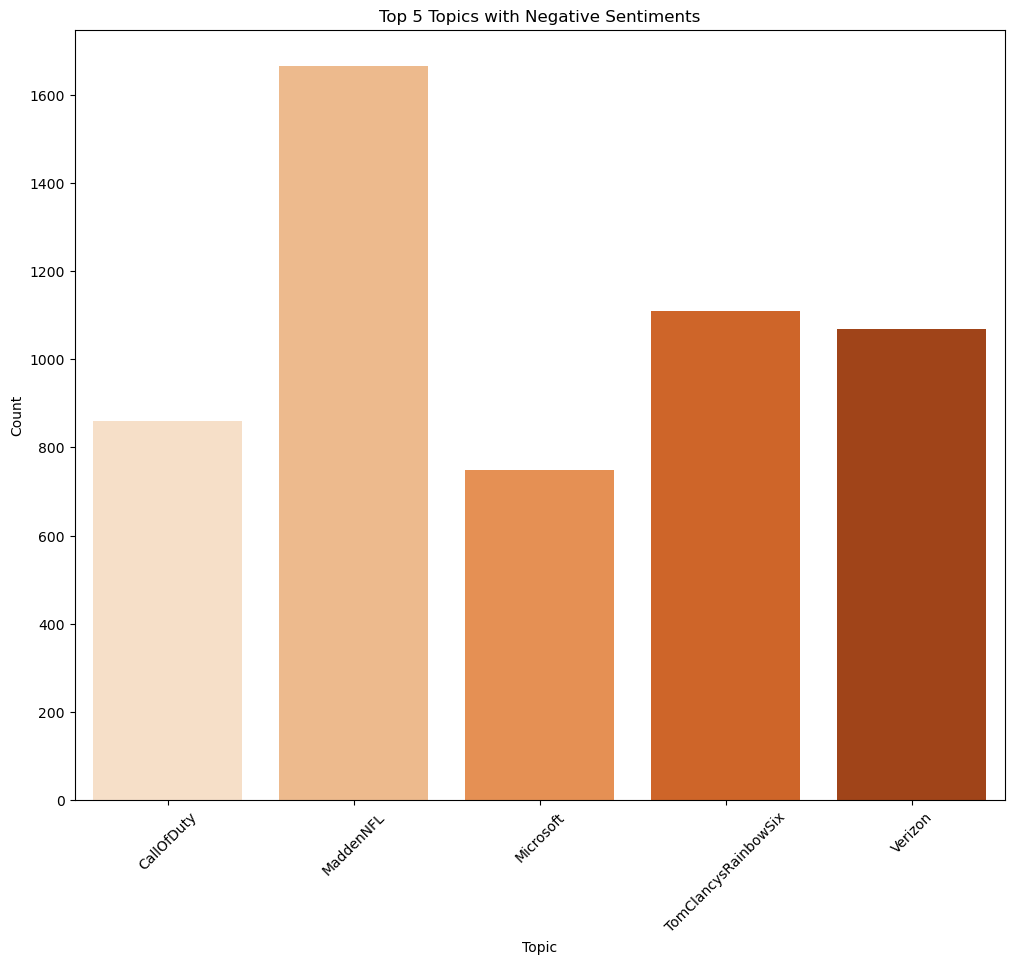

In [84]:
plt.figure(figsize=(12, 10))
sns.barplot(data=top_topics_sentiment[top_topics_sentiment['Sentiment'] == 'Negative'], x='Topic', y='Count', palette='Oranges')
plt.title('Top 5 Topics with Negative Sentiments')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


### Top 5 Topics with Positive Sentiments

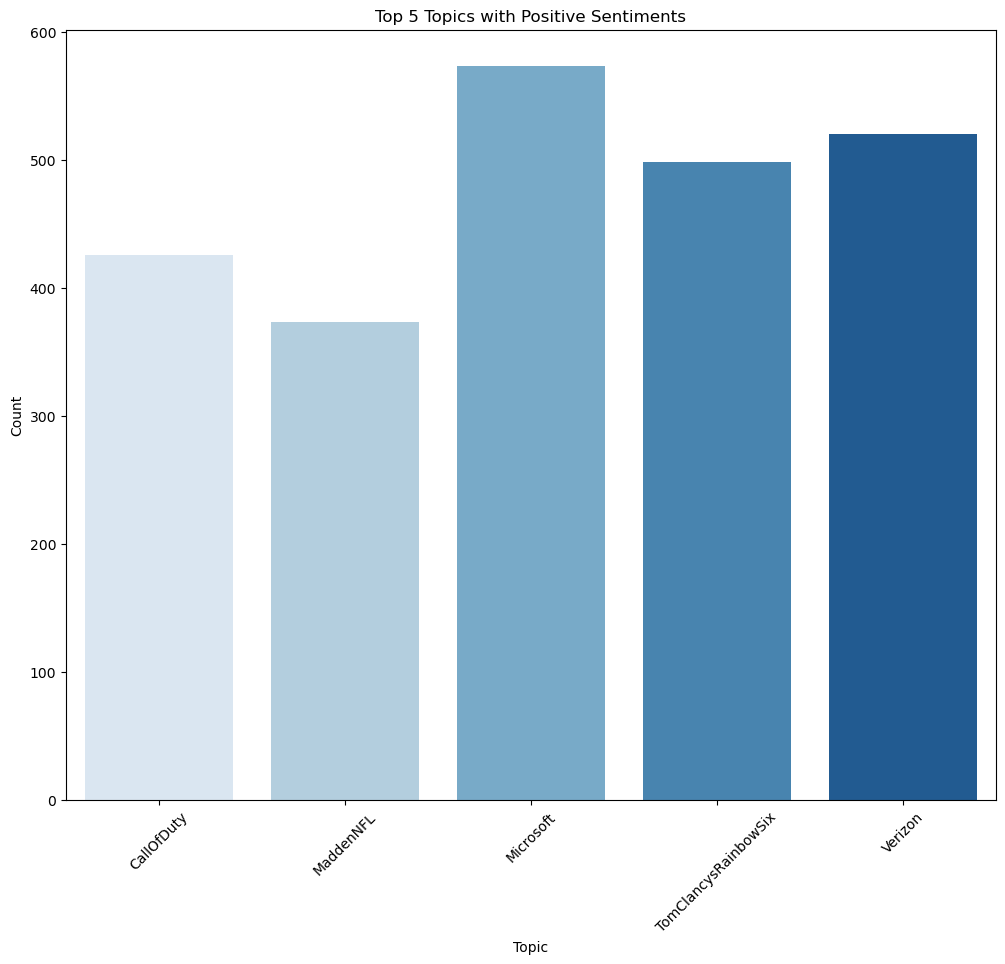

In [86]:
plt.figure(figsize=(12, 10))
sns.barplot(data=top_topics_sentiment[top_topics_sentiment['Sentiment'] == 'Positive'], x='Topic', y='Count', palette='Blues')
plt.title('Top 5 Topics with Positive Sentiments')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### Top 5 Topics with Neutral Sentiments

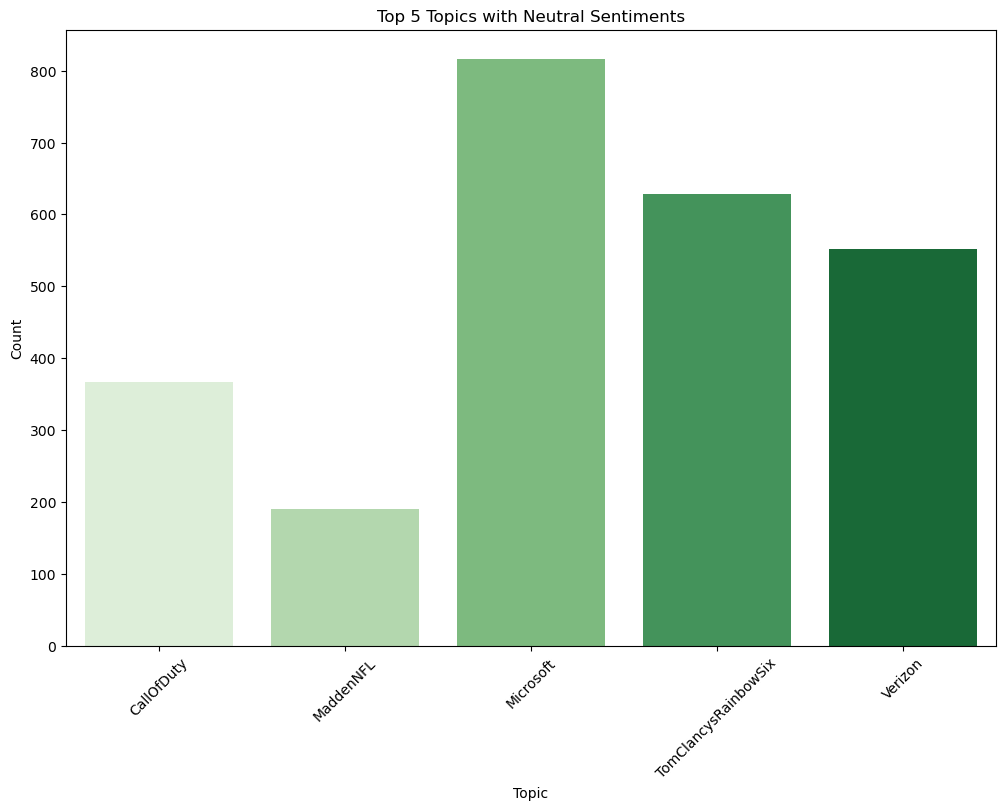

In [80]:
plt.figure(figsize=(12, 8))
sns.barplot(data=top_topics_sentiment[top_topics_sentiment['Sentiment'] == 'Neutral'], x='Topic', y='Count', palette='Greens')
plt.title('Top 5 Topics with Neutral Sentiments')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### Top 5 Topics with Irrelevant Sentiments

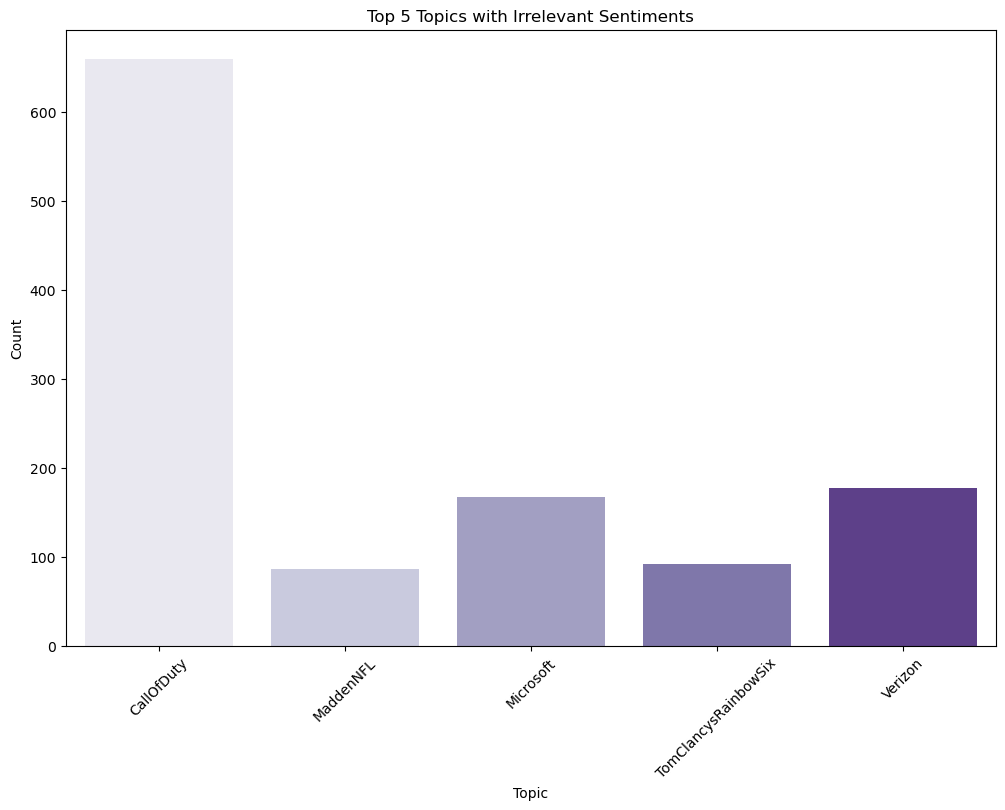

In [79]:
plt.figure(figsize=(12, 8))
sns.barplot(data=top_topics_sentiment[top_topics_sentiment['Sentiment'] == 'Irrelevant'], x='Topic', y='Count', palette='Purples')
plt.title('Top 5 Topics with Irrelevant Sentiments')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## Sentiment Distribution in Google

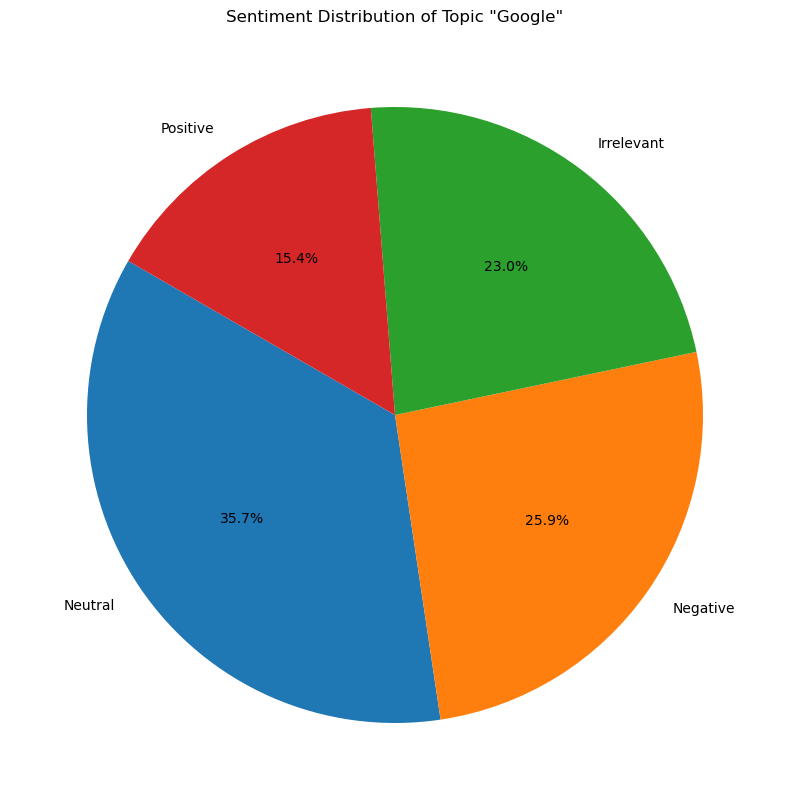

In [96]:
# Filter the dataset to include only entries related to the topic 'Google'
google_data = train[train['Topic'] == 'Google']

# Count the occurrences of each sentiment within the filtered dataset
sentiment_counts = google_data['Sentiment'].value_counts()

# Plot the pie chart
plt.figure(figsize=(10, 10))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=150)
plt.title('Sentiment Distribution of Topic "Google"')
plt.show()


## Sentiment Distribution in Microsoft

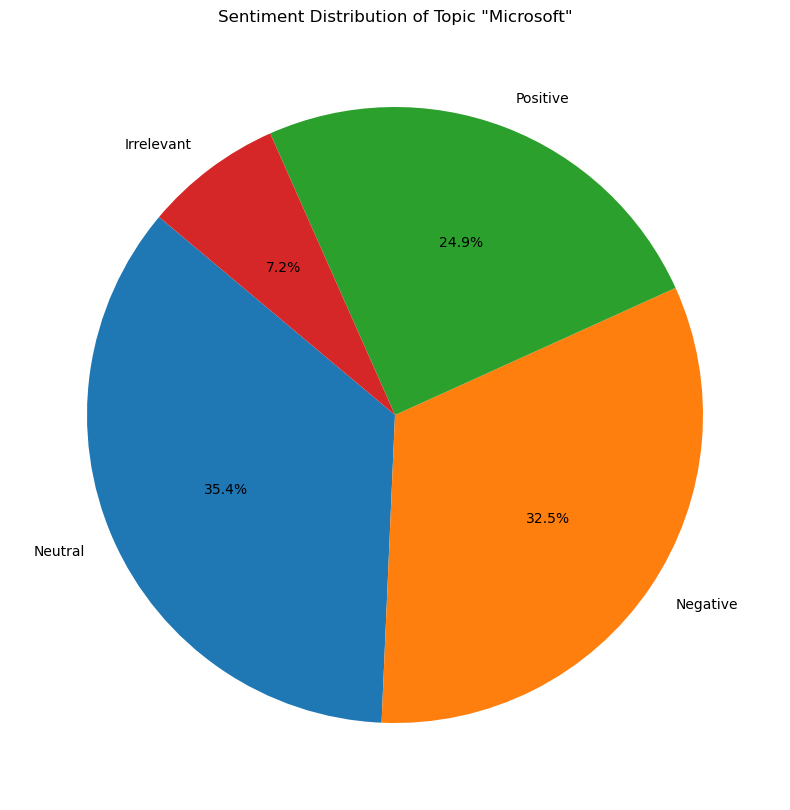

In [97]:
# Filter the dataset to include only entries related to the topic 'Microsoft'
ms_data = train[train['Topic'] == 'Microsoft']

# Count the occurrences of each sentiment within the filtered dataset
sentiment_counts = ms_data['Sentiment'].value_counts()

# Plot the pie chart
plt.figure(figsize=(10, 10))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution of Topic "Microsoft"')
plt.show()

In [99]:
train['msg_len'] = train['Text'].apply(len)

In [100]:
train

,ID,Topic,Sentiment,Text,msg_len
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,53
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,51
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,50
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,51
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,57
...,...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...,128
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...,117
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...,125
74680,9200,Nvidia,Positive,Just realized between the windows partition of...,159


## Plot of message length distribution for training data

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


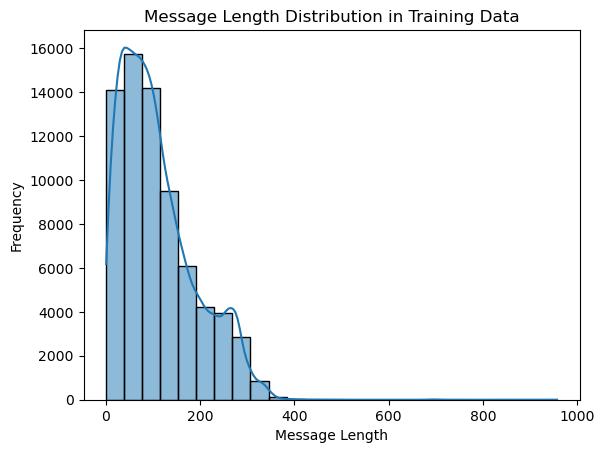

In [101]:
sns.histplot(train['msg_len'], bins=25,kde=True)
plt.title('Message Length Distribution in Training Data')
plt.ylabel('Frequency')
plt.xlabel('Message Length')
plt.show()

## Plot message length distribution by sentiment for training data

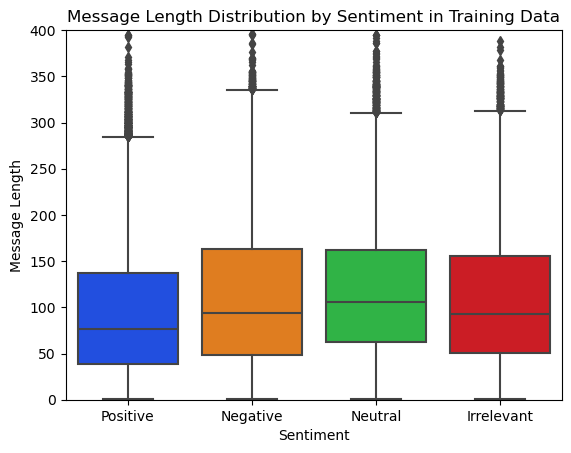

In [104]:
sns.boxplot(data=train, x=train['Sentiment'], y='msg_len', palette='bright', order=['Positive', 'Negative', 'Neutral', 'Irrelevant'])
plt.title('Message Length Distribution by Sentiment in Training Data')
plt.ylabel('Message Length')
plt.xlabel('Sentiment')
plt.ylim(0,400)
plt.show()  

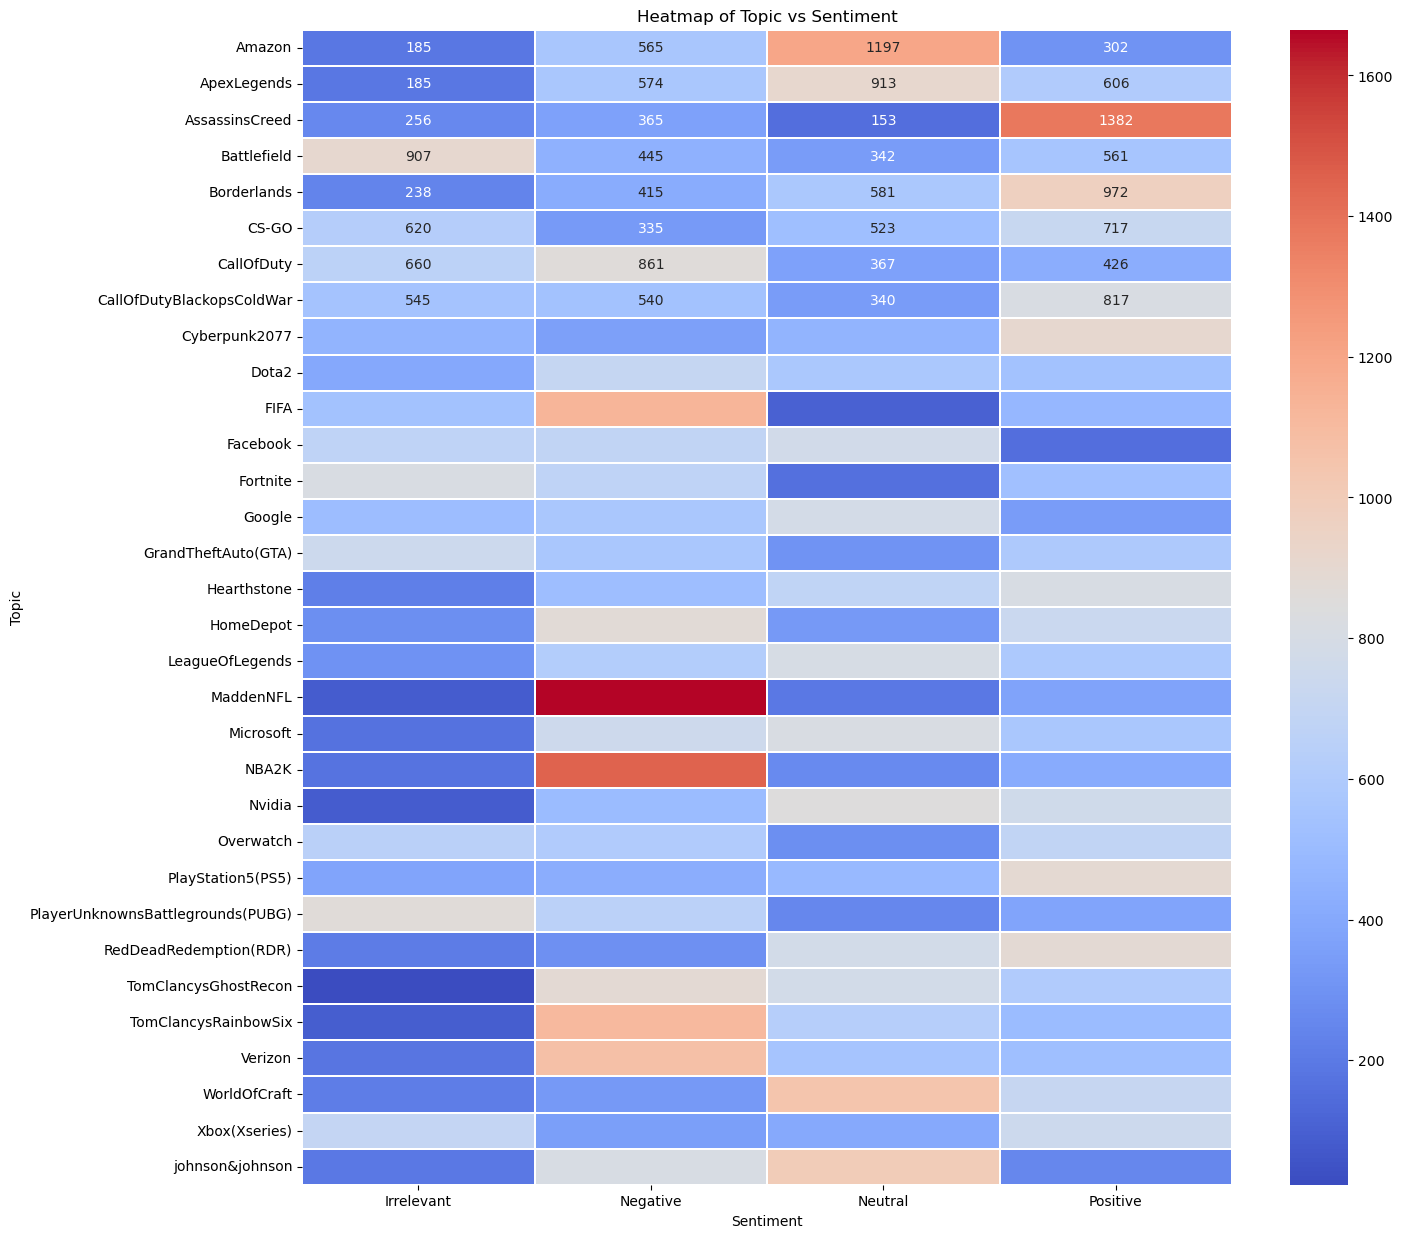

In [113]:
# Create the crosstab
crosstab = pd.crosstab(index=train['Topic'], columns=train['Sentiment'])

# Plot the heatmap
plt.figure(figsize=(15, 15))  
sns.heatmap(crosstab, cmap='coolwarm', annot=True, fmt='d', linewidths=.10)

# Add labels and title
plt.title('Heatmap of Topic vs Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Topic')

# Show the plot
plt.show()


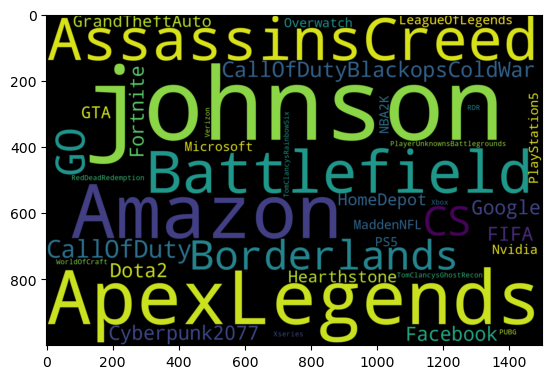

In [127]:
topic_list = ' '.join(crosstab.index)

wc = WordCloud(width=1500, height=1000).generate(topic_list)

plt.imshow(wc, interpolation='bilinear')

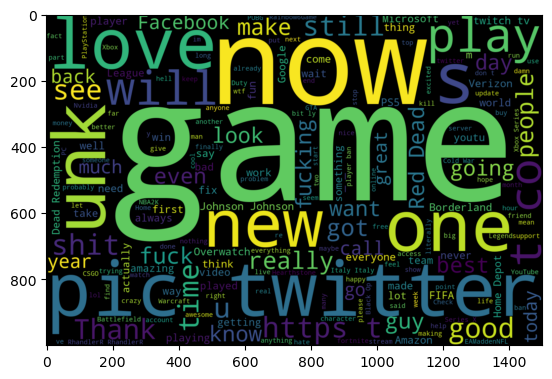

In [126]:
corpus = ' '.join(train['Text'])

wc2 = WordCloud(width=1500, height=1000).generate(corpus)

plt.imshow(wc2, interpolation='bilinear')